### OpenAI Gym. LunarLander-v2 environment

Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. 
Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points.
If lander moves away from landing pad it loses reward back. 
Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. 
Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. 
Landing outside landing pad is possible. 
Fuel is infinite, so an agent can learn to fly and then land on its first attempt. 
Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Problem:**  
To guide the lander to the center of the landing pad and zero speed, maintaining correct orientation (both legs pointing down)  

**State vector (s):**  
* s[0] - x coordinate  
* s[1] - y coordinate  
* s[2] - x speed  
* s[3] - y speed  
* s[4] - angle  
* s[5] - angular speed  
* s[6] - if first leg has contact  
* s[7] - if second leg has contact  


**Possible actions:**   
- 0 - Do nothing  
- 1 - Fire left engine  
- 2 - Fire main engine  
- 3 - Fire right engine  

**Rewards:**
*   +100..140 for landing on the pad
*   +100 for successful landing
*   +10 for each led ground contact
*   -100 for crashing into the ground
*   -0.3 for each firing of the main engine

---

### Keyboard control

In [45]:
! python lunar_lander_keyboard.py

ACTIONS=4
Press keys 1 2 3 ... to take actions 1 2 3 ...
No keys pressed is taking action 0
reward -0.727
reward -0.921
reward -1.038
reward -1.141
reward -1.229
reward -1.303
reward -1.364
reward -1.412
reward -1.449
reward -1.474
reward -1.491
reward -1.499
reward -1.499
reward -1.493
reward -1.481
reward -1.464
reward -1.443
reward 1.658
reward 0.347
reward -0.395
reward -1.046
reward -1.022
reward -0.994
reward -0.964
reward -1.007
reward -0.895
reward -1.503
reward -1.612
reward -1.095
reward -1.680
reward -1.820
reward -2.039
reward -2.210
reward -1.619
reward -1.576
reward 3.258
reward 2.306
reward -1.569
reward 1.075
reward -1.485
reward -1.450
reward 0.486
reward 2.981
reward 0.265
reward -0.267
reward -0.231
reward 2.803
reward 0.355
reward 0.569
reward 0.262
reward -0.781
reward -0.630
reward -0.386
reward -0.042
reward 0.232
reward 0.368
reward 0.272
reward 3.011
reward 0.885
reward 1.020
reward 2.490
reward 0.826
reward 0.556
reward -0.860
reward 0.965
reward 0.473
reward 

---

### Heuristic solution (fuzzy controller)

In [39]:
!python lunar_lander_heuristic.py

observations: -0.01 +1.42 -0.67 +0.28 +0.01 +0.12 +0.00 +0.00
step 0 total_reward +0.70
observations: -0.14 +1.42 -0.60 -0.26 -0.12 -0.19 +0.00 +0.00
step 20 total_reward -2.74
observations: -0.26 +1.18 -0.62 -0.79 -0.25 -0.11 +0.00 +0.00
step 40 total_reward -29.39
observations: -0.37 +0.79 -0.36 -0.72 -0.33 -0.08 +0.00 +0.00
step 60 total_reward +12.12
observations: -0.39 +0.52 +0.05 -0.50 -0.36 +0.02 +0.00 +0.00
step 80 total_reward +55.93
observations: -0.34 +0.35 +0.38 -0.31 -0.23 +0.19 +0.00 +0.00
step 100 total_reward +81.83
observations: -0.25 +0.24 +0.50 -0.19 -0.02 +0.22 +0.00 +0.00
step 120 total_reward +108.23
observations: -0.15 +0.16 +0.42 -0.18 +0.16 +0.11 +0.00 +0.00
step 140 total_reward +111.69
observations: -0.09 +0.08 +0.21 -0.17 +0.22 +0.00 +0.00 +0.00
step 160 total_reward +130.50
observations: -0.07 +0.03 +0.01 -0.08 +0.18 -0.04 +0.00 +0.00
step 180 total_reward +153.11
observations: -0.08 -0.01 -0.06 +0.01 +0.02 +0.15 +1.00 +1.00
step 200 total_reward +188.11
ob

---

### Q-table solution

$\epsilon$-greedy policy  
TD(0) update

Q-Value formula:  
![q-value equation](images/math.svg)

Hyperparameters:
*   $\alpha$ (alpha) is the learning rate (0<$\Large \alpha$<=1) 
*   $\gamma$ (gamma) is the discount factor ($0 \leq \gamma \leq 1$) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.
*   $\epsilon$ (epsilon) is the probability of random action. In our case we start from full exploration (epsilon=1.0) and decrease the value to epsilon_min (=0.01) as episodes pass.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lunar_lander_qtable import QTable, create_env

In [3]:
env = create_env()
agent = QTable(env, alpha=0.1, gamma=.99, epsilon=1.0)

In [30]:
loss = agent.train(20000)

episode: 0/5001, total_reward: -7.889476772890944
Average over last 100 episode: -7.89 

episode: 1/5001, total_reward: -0.11617540892142131
Average over last 100 episode: -4.00 

episode: 2/5001, total_reward: 42.85769723697621
Average over last 100 episode: 11.62 

episode: 3/5001, total_reward: -196.54240860681415
Average over last 100 episode: -40.42 

episode: 4/5001, total_reward: -24.165197293219578
Average over last 100 episode: -37.17 

episode: 5/5001, total_reward: 21.385709757489593
Average over last 100 episode: -27.41 

episode: 6/5001, total_reward: -26.82641063612391
Average over last 100 episode: -27.33 

episode: 7/5001, total_reward: 141.54280327321703
Average over last 100 episode: -6.22 

episode: 8/5001, total_reward: -10.300491296328389
Average over last 100 episode: -6.67 

episode: 9/5001, total_reward: 35.45534935199012
Average over last 100 episode: -2.46 

episode: 10/5001, total_reward: -37.19204381442152
Average over last 100 episode: -5.62 

episode: 11/5

### Training loss

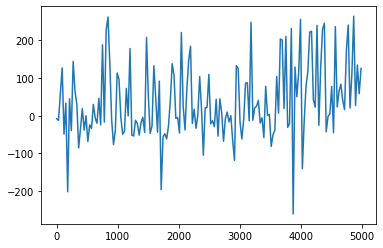

In [48]:
plt.plot(np.arange(1, len(loss)+1, 30), loss[::30])
plt.show();

### Q-table visualization

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,10)) 
actions = ['idle', 'left engine', 'main engine', 'right engine']
n_sample_states = 50
ax[1].set_title('for 10000 iterations')
ax[0].set_title('for 100 iterations')
x_100001 = sns.heatmap(q_table_100001[:n_sample_states], xticklabels=actions, ax=ax[1])
x_1001 = sns.heatmap(q_table_1001[:n_sample_states], xticklabels=actions, ax=ax[0])

In [ ]:
### 

---

### Agent performance before training
<!-- ![before_training](images/training/before_training.gif) -->

In [10]:
!python evaluate_qtable.py qtbl_e50.npy 1

episode: 0/1, score: -239.66588270347802


### Agent performance after 5000 episodes
<!-- ![mid_training](images/training/mid_training.gif) -->

In [11]:
!python evaluate_qtable.py qtbl_e5000.npy 1

episode: 0/1, score: -111.02418280821465


### Agent performance after 20000 episodes

In [ ]:
!python evaluate_qtable.py qtbl_e5000.npy 1